# News Mood

__*Importing Dependencies*__

In [94]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key,
                    consumer_secret,
                    access_token,
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

__*Making A Dictionary For All Major Media Houses*__

In [95]:
#make dictionary of twitter SNs, network names, and colors for graphs
news_labels = {'CNN': 
                   {'name': 'CNN', 
                    'color': 'red'}, 
               'BBCWorld': 
                   {'name': 'BBC World News', 
                    'color': 'blue'}, 
               'CBSNews': 
                   {'name': 'CBS', 
                    'color': 'lightblue'},
               'nytimes': 
                   {'name': 'New York Times', 
                    'color': 'green'}, 
               'FoxNews': 
                   {'name': 'Fox', 
                    'color': 'yellow'}}

__*Making A Dictionary To Store All Data*__

In [55]:
news_dict = {
    "Screen Name": [],
    "Tweet": [],
    "Date": [],
    "Compound Score": [],
    "Positive Score": [],
    "Negative Score": [],
    "Neutral Score": [],
    "Tweets Ago": []
}

__*Looping Through All News Twitter Accounts*__

__*Creating The Dataframe Using Dictionary*__

In [96]:
#converts to dataframe
news_df = pd.DataFrame(news_dict) 
#preview
news_df.head()

,Compound Score,Date,Negative Score,Neutral Score,Positive Score,Screen Name,Tweet,Tweets Ago
0,0.4019,2018-06-04 02:15:06+00:00,0.000,0.863,0.137,CNN,Former US Attorney Preet Bharara says Presiden...,1
1,0.0000,2018-06-04 02:00:12+00:00,0.000,1.000,0.000,CNN,Disney embraces $15 minimum wage in negotiatio...,2
2,0.1027,2018-06-04 01:45:05+00:00,0.157,0.663,0.181,CNN,French Open marathon man Alexander Zverev make...,3
3,-0.9246,2018-06-04 01:30:13+00:00,0.489,0.511,0.000,CNN,"""Her only weapon was her medical vest."" Palest...",4
4,0.0000,2018-06-04 01:15:12+00:00,0.000,1.000,0.000,CNN,Actor Benedict Cumberbatch saves cyclist from ...,5


__*Storing Dataframe Into A CSV*__

In [60]:
news_df.to_csv('Output_CSVs/news_analysis.csv')

__*Calculating Polarity Count*__

In [97]:
by_org = news_df.groupby('Screen Name')

pos_count = news_df[news_df['Compound Score'] > 0].groupby('Screen Name')['Compound Score'].count()
neg_count = news_df[news_df['Compound Score'] < 0].groupby('Screen Name')['Compound Score'].count()
neu_count = news_df[news_df['Compound Score'] == 0].groupby('Screen Name')['Compound Score'].count()


polarity_df = pd.DataFrame({
    "Positive Compound Scores": pos_count,
    "Negative Compound Scores": neg_count,
    "Neutral Compound Scores": neu_count,
    "Total": pos_count + neg_count + neu_count
})
polarity_df

,Negative Compound Scores,Neutral Compound Scores,Positive Compound Scores,Total
Screen Name,,,,
BBCWorld,44,39,17,100
CBSNews,54,35,11,100
CNN,35,34,31,100
FoxNews,41,25,34,100
nytimes,33,30,37,100


__*Calculating Polarity Sum*__

In [98]:
neg_sum = polarity_df['Negative Compound Scores'].sum()
neu_sum = polarity_df['Neutral Compound Scores'].sum()
pos_sum = polarity_df['Positive Compound Scores'].sum()
total = neg_sum + pos_sum + neu_sum

sum_df = pd.DataFrame({
    "Positive Sum": pos_sum,
    "Negative Sum": [neg_sum],
    "Neutral Sum": neu_sum,
    "Total": total 
})

sum_df

,Negative Sum,Neutral Sum,Positive Sum,Total
0,207,163,130,500


__*Calculating Time Difference*__

In [99]:
tmax = by_org['Date'].max()
tmin = by_org['Date'].min()
tdiff = tmax - tmin
tdiff

avg_time_bt_tweets = tdiff/100
time_df = pd.DataFrame({
    "Time Span Between 1 and 100 Tweets Ago": tdiff,
    "Average Time Between Tweets": avg_time_bt_tweets
})

time_df


,Average Time Between Tweets,Time Span Between 1 and 100 Tweets Ago
Screen Name,,
BBCWorld,00:35:50.350000,2 days 11:43:55
CBSNews,00:14:59.090000,1 days 00:58:29
CNN,00:17:06,1 days 04:30:00
FoxNews,00:06:15.130000,0 days 10:25:13
nytimes,00:12:59.980000,0 days 21:39:58


__*Plotting Scatter Graph*__

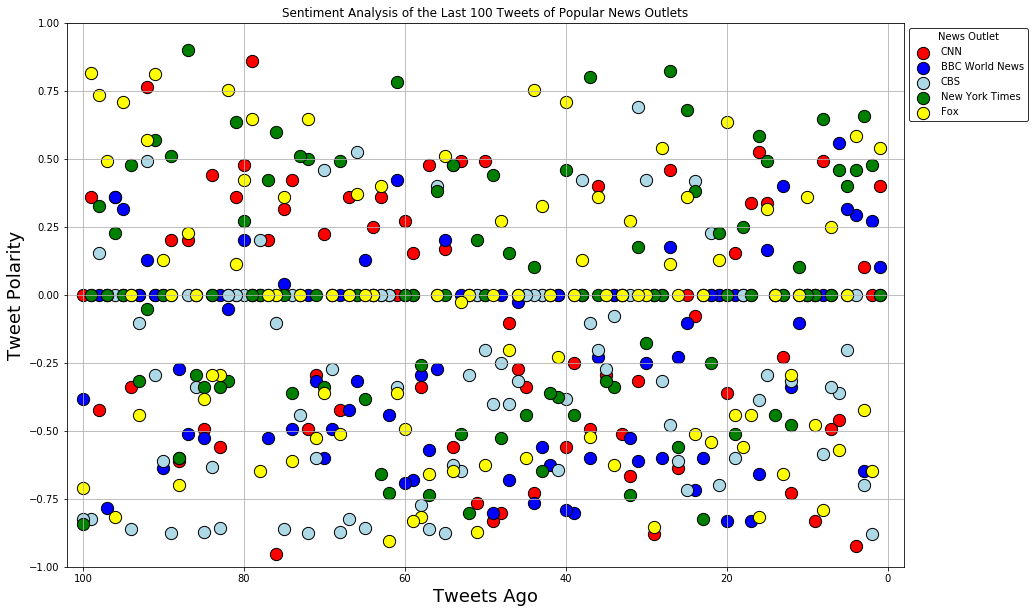

In [101]:
#plots scatter of news ords in dictionary with appr. colors and names from news_labels dict
plt.figure(figsize = (15,10))
plt.xlim(102,-2, -1)
plt.ylim(-1,1)
plt.title(f'Sentiment Analysis of the Last 100 Tweets of Popular News Outlets')
        
for news_org in news_labels.keys():
    df = news_df[news_df['Screen Name'] == news_org]
    yvals = df['Compound Score']
    xvals = df['Tweets Ago']
    labels = news_labels[news_org]['name'] #names from news_labels dict
    colors = news_labels[news_org]['color'] # colors from news labels dict
    plt.scatter(xvals,yvals, label = labels, s = 150, color = colors, edgecolor = 'black')
    

plt.legend(bbox_to_anchor = (1,1),
           frameon = True, 
           edgecolor = 'black', 
           facecolor = 'white',
           title = "News Outlet")
plt.grid(True)
plt.xlabel('Tweets Ago',
          fontdict = {'fontsize': 18})
plt.ylabel('Tweet Polarity',
          fontdict = {'fontsize': 18})
plt.savefig('Output_Graphs/tweets_scatter.png', bbox_inches = 'tight')
plt.show()


__*Plotting Bar Graph*__

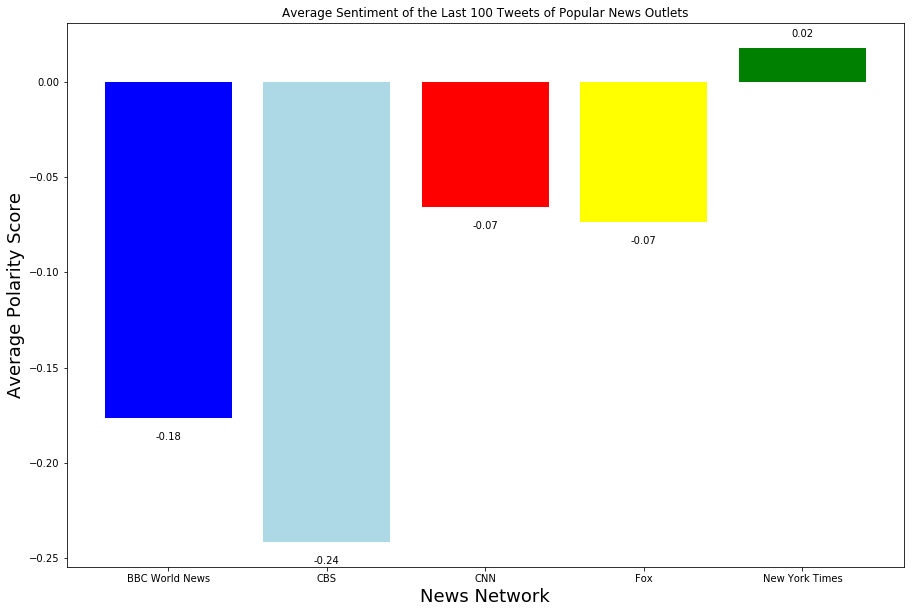

In [107]:
# group by SN and find average of each group
scores_by_org = news_df.groupby('Screen Name')['Compound Score'].mean()

plt.figure(figsize = (15,10))

# bar chart of mean scores labels
plt.title('Average Sentiment of the Last 100 Tweets of Popular News Outlets')
plt.xlabel('News Network',fontdict = {'fontsize': 18})
plt.ylabel('Average Polarity Score',fontdict = {'fontsize': 18})

# list from group by network
xlabels = scores_by_org.index
# location of each bar
xvals = np.arange(len(scores_by_org))

count = 0 # for x coord location of value label

#create each value label
for score in scores_by_org: 
    if score < 0: #for neg scores, put label under
        height = score - .01
    else: # for + scores, put label above
        height = score + .0075
    plt.text(count, height, str(round(score, 2)), ha = 'center', va = 'center')
    count += 1
plt.bar(xvals, 
        scores_by_org, 
        color = [news_labels[x]['color'] for x in xlabels], # sets colors from news_labels dict from xlabel list
        tick_label = [news_labels[x]['name'] for x in xlabels]) # sets x tick labels from news_labels dict
plt.savefig('Output_Graphs/average_scores.png')
plt.show()

__*Conclustion*__
- Most Media houses try to remain neutral in their Tweets.
- Fox Tweets most often and they yet they are relatively less negative.
- NY Times are most positive out of all.
- CBS tweets most negative may be they